<a href="https://colab.research.google.com/github/behrangEhi/complex-network/blob/main/link_prediction_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Demonstrates the implementation of the common neighbors matrix Γ for a given graph G.

The matrix Γ, whose row u and column v are related to the number of common neighbors between vertices u and v, is calculated using the expression Γ(v,u). To calculate the common neighbors of two vertices, each neighboring vertex must also be considered, as the values on the main diagonal of the adjacency matrix are 1.

For example, for a graph of two vertices (K2), the number of common neighbors of the two vertices is 2, as there is a cycle. More generally, for two vertices in the Kn graph, the number of common neighbors will be equal to n.

In [4]:
def common_neighbors_matrix(G):
    """
    Calculates the matrix Γ, where the element at row u and column v represents the number of common neighbors between vertices u and v.

    Args:
        G (nx.Graph): The input graph.

    Returns:
        np.ndarray: The common neighbors matrix Γ.
    """
    n = G.number_of_nodes()
    Gamma = np.zeros((n, n))

    # Iterate over all pairs of vertices
    for u in G.nodes():
        for v in G.nodes():
            # Get the set of neighbors for u and v
            neighbors_u = set(G.neighbors(u))
            neighbors_v = set(G.neighbors(v))

            # Calculate the number of common neighbors
            common_neighbors = len(neighbors_u & neighbors_v)

            # Add the number of common neighbors to the Γ matrix
            Gamma[u, v] = common_neighbors

    # Set the diagonal elements to the number of neighbors for each vertex
    for u in G.nodes():
        Gamma[u, u] = len(list(G.neighbors(u)))

    return Gamma


In [7]:
# Create a sample graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])

# Calculate the common neighbors matrix
Gamma = common_neighbors_matrix(G)
print(Gamma)

[[3. 1. 2. 1.]
 [1. 2. 1. 2.]
 [2. 1. 3. 1.]
 [1. 2. 1. 2.]]


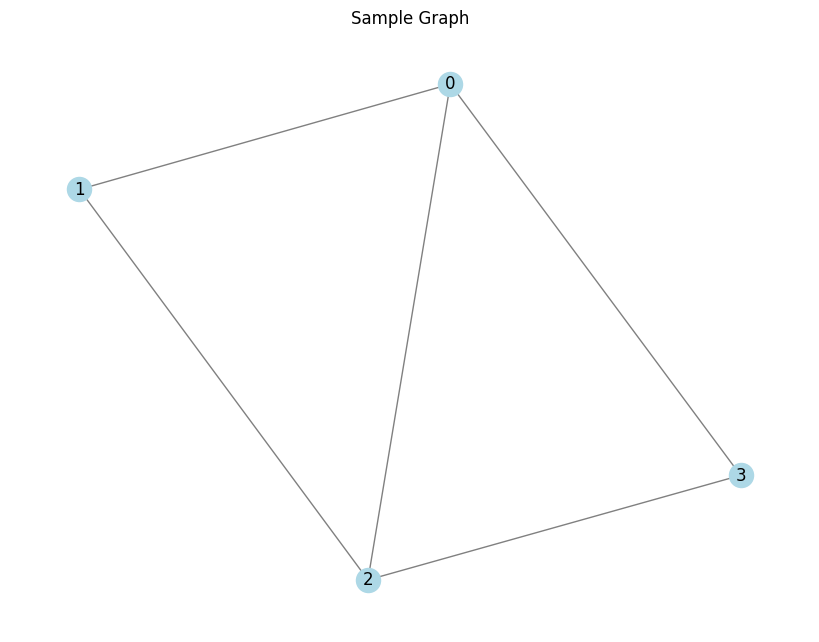

In [9]:
# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=12)
plt.title('Sample Graph')
plt.show()